100%|██████████████████████████████████████████████████████████████████████████| 11499/11499 [00:05<00:00, 1971.38it/s]
D:\ANACONDA\envs\dgl\lib\site-packages\sklearn\utils\validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


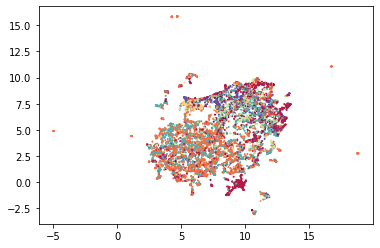

(11499, 2)


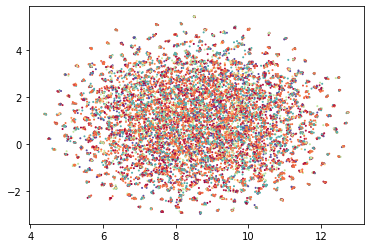

In [1]:
#load library
from collections import Counter
import pandas as pd
import umap
import random 
import numpy as np
import matplotlib.pyplot as plt
#load the superclass of 11499 molecules in the test set 
superclass=list(pd.read_csv('C:/Users/yang/Documents/FastEI/test_set_11499.csv')['superclass'])
#Each superclass is randomly assigned a numeric label
result = Counter(superclass)
b=dict(result.most_common())
keys = list(b.keys())
num=random.sample([i for i in range(0,10000)],21)
df=pd.read_csv('C:/Users/yang/Documents/FastEI/test_set_11499.csv')
df['superclass_code']=''
from tqdm import tqdm
for i in tqdm(range(len(df['superclass']))):
    for j in range(len(keys)):
        if df['superclass'][i]==keys[j]:
            df['superclass_code'][i]=num[j]
        else:
            pass
#umap
reducer = umap.UMAP(random_state=42)
from scipy.sparse import csr_matrix, save_npz,load_npz
#load 11499 meassured spectral word2vec embeddings
word_em= load_npz('C:/Users/yang/Documents/FastEI/test11499main_meassured_word_embeddings.npz').todense().astype('float32')
#load 11499 meassured spectral binnings
binnings=np.load('C:/Users/yang/Documents/FastEI/test11499main_meassured_binnings.npy')
#load 11499 molecular numeric label
t=list(df['superclass_code'])
#umap by 11499 meassured spectral word2vec embeddings
embedding = reducer.fit_transform(word_em)
#print(embedding.shape)
#plot 
plt.scatter(embedding[:, 0], embedding[:, 1], c=t, cmap='Spectral', s=1)
plt.savefig('C:/Users/yang/Documents/FastEI/test_superclass_word_embeddings.tif',dpi=300)
plt.show()

#umap by 11499 meassured spectral binnings
embedding = reducer.fit_transform(binnings)
print(embedding.shape)
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(embedding[:, 0], embedding[:, 1], c=t, cmap='Spectral', s=1)
plt.savefig('C:/Users/yang/Documents/FastEI/test_superclass_binnings.tif',dpi=300)
plt.show()